# Logistic regression with gradient descent

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Generate some data


Synthetic data. `y` is generated by flipping a fair coin. `X` is generated from a mixture of Gaussians with fixed cluster centers.


In [112]:
np.random.seed(42)

In [113]:
def generate_data(n=100):
    # y generated using fair coin flip
    y = (np.random.rand(n) > 0.5).astype(np.int8)
    
    # x location is cluster center + gaussian noise
    centers = np.array([[1, 5], [5, 1]])
    X = centers[y] + np.random.randn(n,2) * 0.8
    
    return X, y

In [114]:
X, y = generate_data()

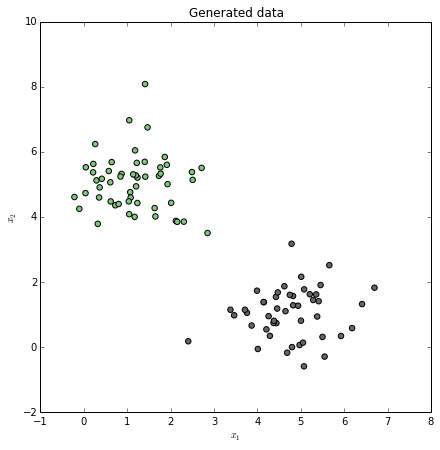

In [115]:
figure(figsize=(7,7))
scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
title('Generated data')
xlabel('$x_1$')
ylabel('$x_2$')

## 2. Define the model, loss, and gradient

The model is a sigmoid of a linear function:
$$
f(x, w, b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

We use the cross entropy loss:
$$
L = \frac{1}{N} \sum_{i=1}^{N} y_i \log f(x_i) + (1-y_i) \log (1 - f(x_i))
$$

The gradient of $L$ wrt. $w$ is simply:
$$
\Delta_w L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) x_i
$$

And wrt. the bias:
$$
\Delta_b L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) 
$$

In [116]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def cross_entropy(y, p):
    return -(y * np.log(p) + (1 - y) * np.log(1.0 - p)).mean()

def loss(X, y, w, b):
    p = predict(X, w, b)
    return cross_entropy(y, p)

def d_loss(X, y, w, b):
    p = predict(X, w, b)
    dw = ((p - y)[:, np.newaxis] * X).mean(axis=0)
    db = (p - y).mean()
    return dw, db

## 3. Gradient descent

In [117]:
def gradient_descent_optimize(X, y, loss, d_loss, lr=1e-3, epochs=2000):
    
    # initialize weights and bias
    w = np.zeros(X.shape[1]) 
    b = 1
    
    # set the initial learning rate
    alpha = lr
    
    # save learning curves to losses
    losses = []
    
    for i in range(epochs):
        
        # compute loss
        L = loss(X, y, w, b)
        
        # print loss
        if i % 10 == 0:
            print('Epoch {} Loss: {}'.format(i, L))
            
        # compute gradient of loss wrt parameters
        dw, db = d_loss(X, y, w, b)
        
        # update parameters
        w = w - alpha * dw
        b = b - alpha * db
        
        # save loss
        losses.append(L)
        
    return w, b, losses

In [118]:
w, b, losses = gradient_descent_optimize(X, y, loss, d_loss, epochs=1000, lr=0.1)

Epoch 0 Loss: 0.843261687518
Epoch 10 Loss: 0.15815950984
Epoch 20 Loss: 0.0929673859345
Epoch 30 Loss: 0.067494521187
Epoch 40 Loss: 0.0537544726815
Epoch 50 Loss: 0.0450843658663
Epoch 60 Loss: 0.0390782047348
Epoch 70 Loss: 0.0346513003311
Epoch 80 Loss: 0.0312409198845
Epoch 90 Loss: 0.0285251949433
Epoch 100 Loss: 0.0263062799546
Epoch 110 Loss: 0.0244556328915
Epoch 120 Loss: 0.0228859796066
Epoch 130 Loss: 0.0215359024771
Epoch 140 Loss: 0.0203608743405
Epoch 150 Loss: 0.0193277925645
Epoch 160 Loss: 0.0184115135761
Epoch 170 Loss: 0.0175925810668
Epoch 180 Loss: 0.016855693185
Epoch 190 Loss: 0.016188642043
Epoch 200 Loss: 0.0155815636197
Epoch 210 Loss: 0.0150263967258
Epoch 220 Loss: 0.0145164858843
Epoch 230 Loss: 0.014046285234
Epoch 240 Loss: 0.0136111346071
Epoch 250 Loss: 0.0132070879929
Epoch 260 Loss: 0.0128307805832
Epoch 270 Loss: 0.0124793246066
Epoch 280 Loss: 0.0121502269101
Epoch 290 Loss: 0.0118413231493
Epoch 300 Loss: 0.0115507247967
Epoch 310 Loss: 0.01127677

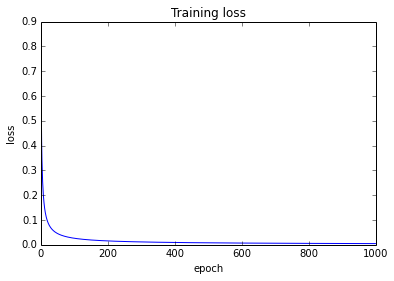

In [119]:
plot(losses)
title('Training loss')
xlabel('epoch')
ylabel('loss')

## 4. Plot the decision boundary

In [120]:
def plot_decision_boundary(X, y, w, b):
    x1 = np.linspace(X[:,0].min(), X[:, 0].max(), 200)
    x2 = np.linspace(X[:,1].min(), X[:, 1].max(), 200)
    X1, X2 = np.meshgrid(x1, x2)
    pts = np.c_[X1.ravel(), X2.ravel()]
    f = predict(pts, w, b).reshape(X1.shape)
    figure(figsize=(7,7))
    scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
    contour(X1, X2, f, 1, levels=[0.5])
    xlabel('$x_1$')
    ylabel('$x_2$')
    title('Decision boundary')
    

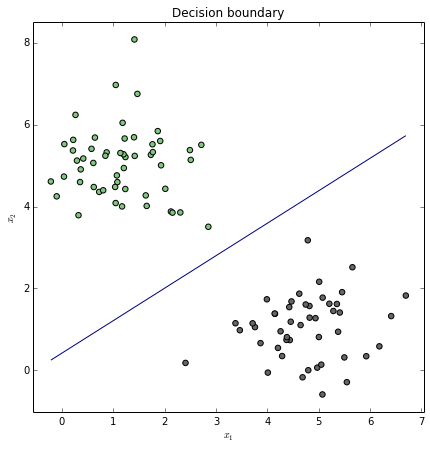

In [121]:
plot_decision_boundary(X, y, w, b)

In [122]:
print w, b

[ 1.75098391 -2.20772945] 0.926579281609
